In [1]:
import jax
jax.config.update('jax_platform_name', 'cpu')

In [5]:
from entot.data.data import create_gaussians, create_gaussian_split
from entot.plotting.plots import plot_1D
from entot.models.models import NoiseOutsourcingModel, KantorovichGapModel
from entot.models.utils import DataLoader
import matplotlib.pyplot as plt
import h5py

import numpy as np
import jax
import jax.numpy as jnp

In [38]:
def h5py_to_dataset(path, img_size=64, batch_size: int = 64):
    with h5py.File(path, "r") as f:
        # List all groups
        print("Keys: %s" % f.keys())
        a_group_key = list(f.keys())[0]

        # Get the data
        data = list(f[a_group_key])
    
        #dataset = 2 * jnp.transpose(jnp.array(data) / 255., (0, 3, 1, 2))- 1
        dataset = jnp.array(data) / 255.
        dataset = jax.image.resize(dataset, (len(dataset), img_size, img_size, 3), method='bilinear')    

    return DataLoader(dataset, batch_size=batch_size)

In [39]:
handbags = h5py_to_dataset("../../../../data/handbag_128.hdf5")

Keys: <KeysViewHDF5 ['imgs']>


In [16]:
shoes = h5py_to_dataset("../../../../data/shoes_128.hdf5")

Keys: <KeysViewHDF5 ['imgs']>


In [40]:
batch=handbags(jax.random.PRNGKey(0))

In [44]:
len(handbags.data)

138767

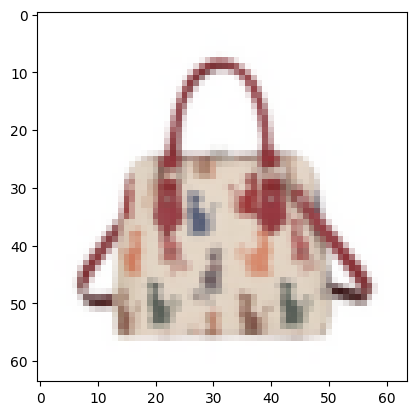

In [45]:
plt.imshow(batch[2, :, :, ])

In [37]:
batch[0, :, :, ]

Array([[[-0.07563025, -0.07563025, -0.07563025],
        [-0.00686274, -0.00686274, -0.00686274],
        [-0.00392157, -0.00392157, -0.00392157],
        ...,
        [-0.00392157, -0.00392157, -0.00392157],
        [-0.00392157, -0.00392157, -0.00392157],
        [-0.00392157, -0.00392157, -0.00392157]],

       [[-0.07563025, -0.07563025, -0.07563025],
        [-0.00686274, -0.00686274, -0.00686274],
        [-0.00392157, -0.00392157, -0.00392157],
        ...,
        [-0.00392157, -0.00392157, -0.00392157],
        [-0.00392157, -0.00392157, -0.00392157],
        [-0.00392157, -0.00392157, -0.00392157]],

       [[-0.07563025, -0.07563025, -0.07563025],
        [-0.00686274, -0.00686274, -0.00686274],
        [-0.00392157, -0.00392157, -0.00392157],
        ...,
        [-0.00392157, -0.00392157, -0.00392157],
        [-0.00392157, -0.00392157, -0.00392157],
        [-0.00392157, -0.00392157, -0.00392157]],

       ...,

       [[-0.07647058, -0.07647058, -0.07647058],
        [-0

In [46]:
def h5py_2(path, img_size=64, batch_size: int = 64):
    with h5py.File(path, "r") as f:
        # List all groups
        print("Keys: %s" % f.keys())
        a_group_key = list(f.keys())[0]

        # Get the data
        data = list(f[a_group_key])
    
        #dataset = 2 * jnp.transpose(jnp.array(data) / 255., (0, 3, 1, 2))- 1
        #dataset = jnp.array(data) / 255.
        #dataset = jax.image.resize(dataset, (len(dataset), img_size, img_size, 3), method='bilinear')    

    return jnp.array(data)

In [51]:
h = h5py_2("../../../../data/handbag_128.hdf5")

Keys: <KeysViewHDF5 ['imgs']>


In [53]:
h.shape

(138767, 128, 128, 3)

In [ ]:
kg = KantorovichGapModel(epsilon=0.1, input_dim=10, iterations=5000)